<a href="https://colab.research.google.com/github/Ayush-Singh-36/clustering_unsupervised_ml/blob/main/clustering_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

**kMeans clustering**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='sepal_length', ylabel='petal_length'>

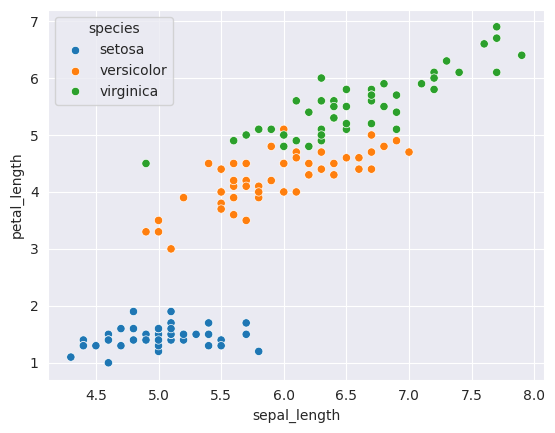

In [23]:
sns.scatterplot(data = iris_df, x = 'sepal_length', y = 'petal_length', hue='species')

In [24]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
x = iris_df[numeric_cols]

In [25]:
from sklearn.cluster import KMeans

# KMeans requires numeric data, so we drop the 'species' column
model = KMeans(n_clusters=3, n_init='auto', random_state=42)
model.fit(x.drop(columns=['species']))

KMeans(n_clusters=3, random_state=42)

In [26]:
model.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [27]:
x

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [28]:
preds = model.predict(x.drop(columns=['species']))
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

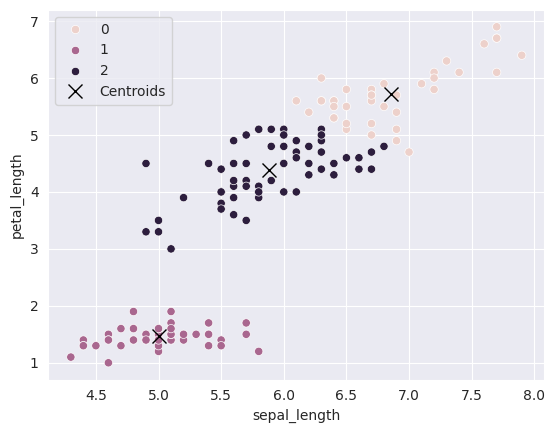

In [29]:
sns.scatterplot(data = x, x = 'sepal_length', y = 'petal_length', hue = preds);
# Extract centroids for sepal_length (index 0) and petal_length (index 2)
centers = model.cluster_centers_
plt.plot(centers[:, 0], centers[:, 2], 'kx', markersize=10, label='Centroids')
plt.legend();

In [30]:
model.inertia_

78.85566582597727

<Axes: xlabel='sepal_length', ylabel='petal_length'>

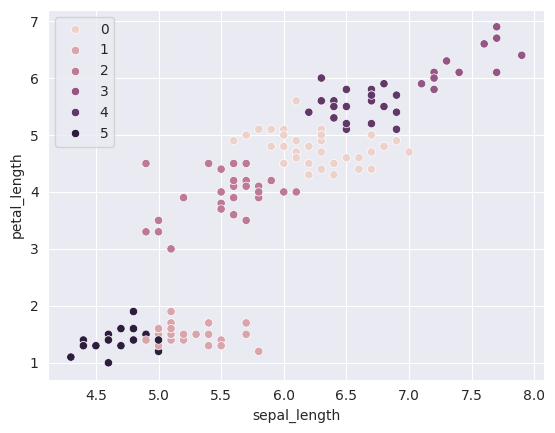

In [31]:
model = KMeans(n_clusters=6, n_init='auto', random_state=42).fit(x.drop(columns=['species']))
preds = model.predict(x.drop(columns=['species']))
sns.scatterplot(data = x, x = 'sepal_length', y = 'petal_length', hue = preds)

In [32]:
model.inertia_

39.066035353535376

Text(0, 0.5, 'Inertia')

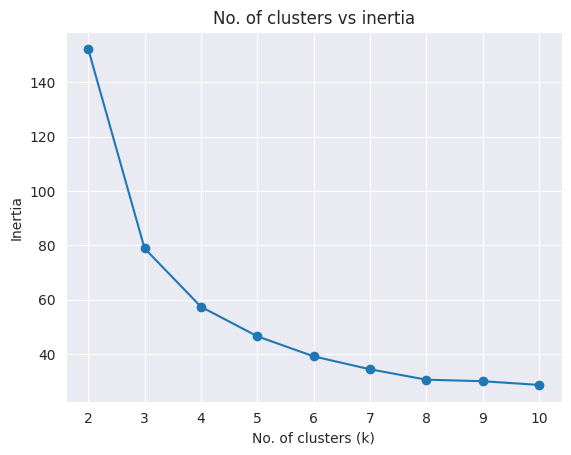

In [33]:
options = range(2, 11)
inertias = []
for n_clusters in options:
  model = KMeans(n_clusters, random_state = 42).fit(x.drop(columns=['species']))
  inertias.append(model.inertia_)
plt.title("No. of clusters vs inertia")
plt.plot(options, inertias, '-o')
plt.xlabel("No. of clusters (k)")
plt.ylabel("Inertia")

**DBSCAN clustering**

<Axes: xlabel='sepal_length', ylabel='petal_length'>

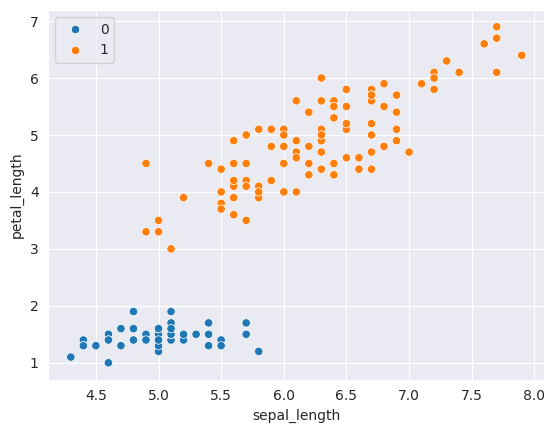

In [34]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=1.1, min_samples=4)
model.fit(x.drop(columns=['species']))
model.labels_
sns.scatterplot(data = x, x = 'sepal_length', y = 'petal_length', hue=model.labels_)

Master the fundamentals of unsupervised learning with this clustering-focused project. Using the classic Iris dataset, we explore and compare key algorithms like K-Means and DBSCAN. Learn how to determine optimal cluster counts using the Elbow Method (Inertia) and visualize groupings effectively. Perfect for clarifying core data science concepts.

# Detailed Project Overview: Clustering the Iris Dataset

This project serves as a comprehensive guide to understanding **Unsupervised Learning** through clustering techniques. We utilize the famous Iris dataset to demonstrate how data can be grouped based on inherent features without prior labels.

## Key Objectives
- **Algorithm Comparison**: Implementing and comparing Centroid-based (K-Means) and Density-based (DBSCAN) clustering.
- **Optimal Parameter Selection**: Using the **Elbow Method** to calculate inertia across different values of $k$ to identify the most natural groupings.
- **Data Visualization**: Creating 2D scatter plots to visualize cluster formation and centroid locations.

## Methodology

### 1. K-Means Clustering
We apply K-Means to partition the dataset into $k$ clusters. The project illustrates how inertia (within-cluster sum-of-squares) decreases as $k$ increases, helping us find the 'elbow' point for optimal clustering.

### 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Unlike K-Means, DBSCAN identifies clusters based on the density of data points. This section demonstrates how to handle data that may not have clearly defined spherical boundaries and how the algorithm identifies outliers.

### 3. Feature Selection
To simplify visualization, we focus on key numeric features like sepal length and petal length, demonstrating how even a subset of dimensions can reveal significant patterns in the data.

## Summary
By the end of this project, you will have a clear understanding of how different clustering parameters affect the resulting groups and how to evaluate the performance of unsupervised models visually and mathematically.